<a href="https://colab.research.google.com/github/varunkr24/CNN-Image-Classification-1/blob/Python/CNN_Plant_Seedling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DOMAIN: Image Classification

#Objective:   
Create classifier capable of determining a plant's species from its image. We will build a CNN based classifier, a Neural network based classifier and a SVM based classifier

#Data Description:    
The dataset comprises of images from 12 plant species. Source: https://www.kaggle.com/c/plant-seedlings-classification/data

#Import libraries

In [1]:
# import needed libraries
import os as os
from PIL import Image
from array import array
import cv2 as cv2
from glob import glob
import time
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

from keras.utils import np_utils
from sklearn import preprocessing

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.layers import GlobalMaxPool2D
from keras.layers import BatchNormalization
from keras import optimizers
from keras.optimizers import Adam
from keras import regularizers
from keras import layers
seed = 7
np.random.seed(seed)

# for API
from keras.models import Model
from keras.layers import Input, Concatenate, Dense, Dropout, Flatten, Activation

from keras.layers.normalization import BatchNormalization
from keras.utils import to_categorical
from keras import backend as K


In [2]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.4.1'

#Mount the Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd /content/drive/MyDrive/AIML/Projects/CNN/PlantSeedling/Part1/

/content/drive/MyDrive/AIML/Projects/CNN/PlantSeedling/Part1


#Load dataset to train the model

In [5]:
import os
os.chdir('./train')

In [6]:
os.getcwd()

'/content/drive/MyDrive/AIML/Projects/CNN/PlantSeedling/Part1/train'

In [7]:
!ls "/content/drive/MyDrive/AIML/Projects/CNN/PlantSeedling/Part1/"

'Seedling - Prediction'   test	 train


In [8]:
pathToTrain = '/content/drive/MyDrive/AIML/Projects/CNN/PlantSeedling/Part1/train/'

listing = os.listdir( pathToTrain ) 
num_folders = len(listing)
print ( num_folders)
trainArray = [[]]
trainImagesPaths = []
trainImagesCategories = []
trainImg = []
scaleTo = 71
seed = 7

t0=time.time()

for imgFolder in listing:
  print(imgFolder)
  path = '/content/drive/MyDrive/AIML/Projects/CNN/PlantSeedling/Part1/train/' + imgFolder + '/'
  files = os.listdir( path ) 
  for imgFile in files:
    imgPath = path + imgFile
    trainArray.append([imgPath, imgFolder]) # image path, image folder
    trainImagesPaths.append(imgPath) # paths to images
    trainImagesCategories.append(imgFolder) # labels
    
    trainImg.append(cv2.resize(cv2.imread(imgPath), (scaleTo, scaleTo))) # images
    
t1=time.time()
print(t1-t0," seconds")

12
Black-grass
Scentless Mayweed
Maize
Charlock
Common Chickweed
Common wheat
Loose Silky-bent
Cleavers
Shepherds Purse
Fat Hen
Sugar beet
Small-flowered Cranesbill
4079.932799100876  seconds


Image Dataset loaded successfully   
There are 12 folders as mentioned above which also happen to be true labels for the images inside   
trainArray consist of image path and true lables i.e. folder name   
trainInagesPaths contains only path   
trainImagesCategories contains true lables   
trainImages conains Images   
This trainArray will be divided into train and test

#Prediction dataset

**This image dataset has no labels therefore will be used for prediction purpose only**

In [13]:
cd /content/drive/MyDrive/AIML/Projects/CNN/PlantSeedling/Part1/

/content/drive/MyDrive/AIML/Projects/CNN/PlantSeedling/Part1


In [14]:
os.chdir('./test')  

In [15]:
pathToTest = '/content/drive/MyDrive/AIML/Projects/CNN/PlantSeedling/Part1/test/'

listing = os.listdir( pathToTest) 

In [16]:
listing_ = listing[3:]

In [17]:
num_images = len(listing_)
print (num_images)
testImg = []
scaleTo = 71
seed = 7

t0=time.time()

for img in listing_:
  #print(img)
  testImg.append(cv2.resize(cv2.imread(img),(scaleTo, scaleTo))) # images
     
t1=time.time()
print(t1-t0," seconds")

792
527.8903653621674  seconds


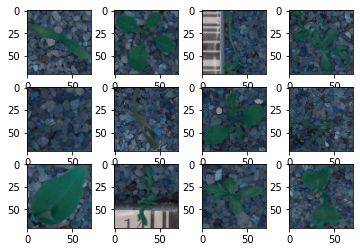

In [18]:
for i in range(12):
  plt.subplot(3,4, i+1)
  plt.imshow(testImg[i])

In [54]:
#coverting list of images into an array
testImgArray = np.asarray(testImg)

In [55]:
# normalize the test images
testImgArray = testImgArray/255

#Explore image dataset to be used for training and testing

In [19]:
# gives the path to the first image
trainImagesPaths[1]

'/content/drive/MyDrive/AIML/Projects/CNN/PlantSeedling/Part1/train/Black-grass/fc1001932.png'

In [20]:
# create an array of all the images
trainImgNParray = np.asarray(trainImg)

# dataframe of all the categories matching each image
trainlabel = pd.DataFrame(trainImagesCategories)

In [21]:
# check the length of the training images
len(trainImgNParray)

4766

In [22]:
# check the length of labels for confirmation
len(trainlabel)

4766

In [23]:
# checking the shape of the first image.
trainImgNParray[1].shape

(71, 71, 3)

In [24]:
# verifing the data type
type(trainImgNParray)

numpy.ndarray

In [25]:
# check the length of the path of images
len(trainImagesPaths)

4766

In [26]:
# print first 5 images' path
print(trainImagesPaths[0:5])

['/content/drive/MyDrive/AIML/Projects/CNN/PlantSeedling/Part1/train/Black-grass/fab809601.png', '/content/drive/MyDrive/AIML/Projects/CNN/PlantSeedling/Part1/train/Black-grass/fc1001932.png', '/content/drive/MyDrive/AIML/Projects/CNN/PlantSeedling/Part1/train/Black-grass/fef14b865.png', '/content/drive/MyDrive/AIML/Projects/CNN/PlantSeedling/Part1/train/Black-grass/f39ddbe0a.png', '/content/drive/MyDrive/AIML/Projects/CNN/PlantSeedling/Part1/train/Black-grass/fb487c5a4.png']


#Dispaly images

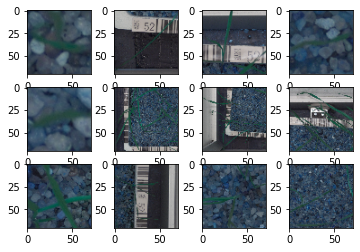

In [27]:
for i in range(12):
  plt.subplot(3,4, i+1)
  plt.imshow(trainImg[i])

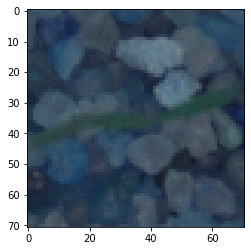

In [28]:
plt.imshow(trainImg[3])

#Shape of images

In [29]:
im = trainImg[3]
im.shape

(71, 71, 3)

#Check paths and labels in trainArray

In [30]:
trainArray[7][0]

'/content/drive/MyDrive/AIML/Projects/CNN/PlantSeedling/Part1/train/Black-grass/f84089a55.png'

In [31]:
trainArray[7][1]

'Black-grass'

In [32]:
trainArray[8]


['/content/drive/MyDrive/AIML/Projects/CNN/PlantSeedling/Part1/train/Black-grass/f5ca3d442.png',
 'Black-grass']

In [33]:
trainImgNParray.shape

(4766, 71, 71, 3)

In [34]:
trainlabel.shape

(4766, 1)

#Apply filters on images

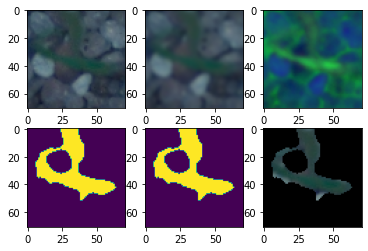

In [35]:
clearTrainImg = []
examples = []; getEx = True
for img in trainImgNParray:
    # Use gaussian blur
    blurImg = cv2.GaussianBlur(img, (5, 5), 0)   
    
    # Convert to HSV image
    hsvImg = cv2.cvtColor(blurImg, cv2.COLOR_BGR2HSV)  
    
    # Create mask (parameters - green color range)
    lower_green = (25, 40, 50)
    upper_green = (75, 255, 255)
    mask = cv2.inRange(hsvImg, lower_green, upper_green)  
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    # Create bool mask
    bMask = mask > 0  
    
    # Apply the mask
    clear = np.zeros_like(img, np.uint8)  # Create empty image
    clear[bMask] = img[bMask]  # Apply boolean mask to the origin image
    
    clearTrainImg.append(clear)  # Append image without background
    
    # Show examples
    if getEx:
        plt.subplot(2, 3, 1); plt.imshow(img)  # Show the original image
        plt.subplot(2, 3, 2); plt.imshow(blurImg)  # Blur image
        plt.subplot(2, 3, 3); plt.imshow(hsvImg)  # HSV image
        plt.subplot(2, 3, 4); plt.imshow(mask)  # Mask
        plt.subplot(2, 3, 5); plt.imshow(bMask)  # Boolean mask
        plt.subplot(2, 3, 6); plt.imshow(clear)  # Image without background
        getEx = False

clearTrainImg = np.asarray(clearTrainImg)

#Normalize the images

In [36]:
clearTrainImg = clearTrainImg/255

#Encode the Labels for images

Classes: ['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']
Number of classes: 12


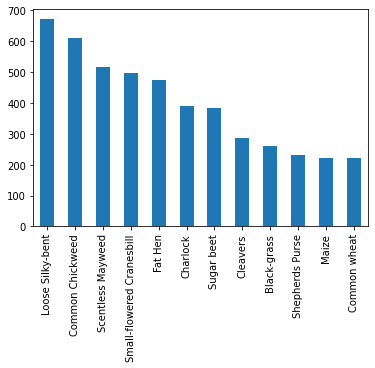

In [38]:
# Encode labels and create classes
le = preprocessing.LabelEncoder()
le.fit(trainlabel[0])
print("Classes: " + str(le.classes_))
encodeTrainLabels = le.transform(trainlabel[0])

# Make labels categorical
clearTrainLabel = np_utils.to_categorical(encodeTrainLabels)
num_clases = clearTrainLabel.shape[1]
print("Number of classes: " + str(num_clases))

# Plot of label types numbers
trainlabel[0].value_counts().plot(kind='bar')

In [39]:
encodeTrainLabels.shape
# we will use this encodeTrainLabels in suprevised learning as target


(4766,)

In [40]:
# check the data type of the training images
clearTrainImg.dtype

dtype('float64')

#Split image dataset into train and test

In [41]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(clearTrainImg, clearTrainLabel, 
                                                test_size=0.10, random_state=seed, 
                                                stratify = clearTrainLabel)

In [42]:
#class associated with the first image
trainY[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

Class associated with the first image is represented on a number scale from 0 t0 11      
For e.g. above label belong to 4th species of the given plant seedlings.

#Data Augmentation

In [43]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=180,  # randomly rotate images in the range
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally
        height_shift_range=0.1,  # randomly shift images vertically 
        horizontal_flip=True,  # randomly flip images horizontally
        vertical_flip=True  # randomly flip images vertically
    )  
datagen.fit(trainX)

#Image Classification using Convolutional

**Model 1**

**Create model**

In [44]:
modela = Sequential() 
# 2D Convolution layer
modela.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(scaleTo, scaleTo, 3))) 
modela.add(layers.MaxPooling2D((2, 2))) # to downsample the feature maps
# 2D Convolution layer
modela.add(layers.Conv2D(64, (3, 3), activation='relu')) 
modela.add(layers.MaxPooling2D((2, 2)))
# 2D Convolution layer
modela.add(layers.Conv2D(128, (3, 3), activation='relu'))
modela.add(layers.MaxPooling2D((2, 2)))
# 2D Convolution layer
modela.add(layers.Conv2D(128, (3, 3), activation='relu'))
modela.add(layers.MaxPooling2D((2, 2))) 
modela.add(layers.Flatten()) 
modela.add(layers.Dense(64, activation='relu'))

#Add Output Layer
modela.add(layers.Dense(num_clases, activation='softmax'))


modela.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_B = modela
model_B.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 69, 69, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 128)         1

**Train the model**

In [45]:
t0=time.time()
history_B = model_B.fit_generator(datagen.flow(trainX, trainY, batch_size=70), epochs=50, validation_data=(testX, testY), verbose=2)
t1=time.time()
print(t1-t0," seconds")

# Final evaluation of the model
scores_B = model_B.evaluate(testX, testY, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores_B[1]*100))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
62/62 - 37s - loss: 2.0641 - accuracy: 0.2949 - val_loss: 1.6567 - val_accuracy: 0.4193
Epoch 2/50
62/62 - 37s - loss: 1.6351 - accuracy: 0.4171 - val_loss: 1.3866 - val_accuracy: 0.5094
Epoch 3/50
62/62 - 37s - loss: 1.4245 - accuracy: 0.4943 - val_loss: 1.2551 - val_accuracy: 0.5577
Epoch 4/50
62/62 - 37s - loss: 1.2952 - accuracy: 0.5467 - val_loss: 1.1455 - val_accuracy: 0.5912
Epoch 5/50
62/62 - 37s - loss: 1.1897 - accuracy: 0.5841 - val_loss: 1.0244 - val_accuracy: 0.6352
Epoch 6/50
62/62 - 37s - loss: 1.0929 - accuracy: 0.6316 - val_loss: 0.9310 - val_accuracy: 0.6960
Epoch 7/50
62/62 - 37s - loss: 1.0688 - accuracy: 0.6463 - val_loss: 0.9409 - val_accuracy: 0.6813
Epoch 8/50
62/62 - 37s - loss: 0.9345 - accuracy: 0.6871 - val_loss: 0.8707 - val_accuracy: 0.7128
Epoch 9/50
62/62 - 37s - loss: 0.8629 - accuracy: 0.7060 - val_loss: 0.8316 - val_accuracy: 0.7149
Epoch 10/50
62/62 - 37s - loss: 0.8354 - accuracy: 0.7216 - val_loss: 0.7795 - val_accuracy: 0.7254
Epoch 11/

**Evaluate model**

In [46]:
print(model_B.evaluate(trainX, trainY))  # Evaluate on train set
print(model_B.evaluate(testX, testY))  # Evaluate on test set

135/135 [==============================] - 9s 67ms/step - loss: 0.2874 - accuracy: 0.8927
[0.28735828399658203, 0.8927488923072815]
15/15 [==============================] - 1s 66ms/step - loss: 0.3502 - accuracy: 0.8784
[0.3501913547515869, 0.8784067034721375]


**Visualize loss and accuracy on train and test**

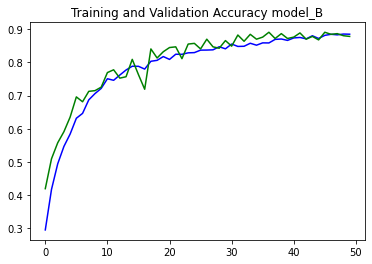

In [47]:
# plot training accuracies
plt.plot(history_B.history['accuracy'],'b') #train acc
plt.plot(history_B.history['val_accuracy'],'g') #val acc
plt.title('Training and Validation Accuracy model_B') 
plt.show()

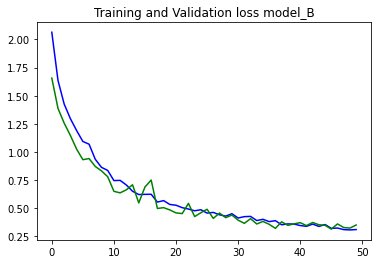

In [48]:
# plot training and validation loss
plt.plot(history_B.history['loss'],'b') #train loss
plt.plot(history_B.history['val_loss'],'g') #val loss
plt.title('Training and Validation loss model_B') 
plt.show()

Training and validation accruracy are 89% and 87% respectively       
Accuracy and loss changes slowly after 30 epochs i.e. learning becomes slow

**Model 2**   
Add more conv. layers and use batch normalization

**Create Model**

In [ ]:
model = Sequential()

# Input layer and 2D Con
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(scaleTo, scaleTo, 3)))

# Max Pool layer 
# It downsmaples the input representetion within the pool_size size
model.add(layers.MaxPool2D(pool_size = (2,2)))

# Normalization layer
# The layer normalizes its output using the mean and standard deviation of the current batch of inputs.
model.add(layers.BatchNormalization())

# 2D Convolution layer
model.add(layers.Conv2D(64, kernel_size=(3,3), strides = (1,1), activation='relu'))

# Max Pool layer 
model.add(layers.MaxPool2D(pool_size = (2,2)))

# Normalization layer
model.add(layers.BatchNormalization())

# 2D Convolution layer
model.add(layers.Conv2D(128, kernel_size=(3,3), strides = (1,1), activation='relu'))

# Max Pool layer 
model.add(layers.MaxPool2D(pool_size = (2,2)))

# Normalization layer
model.add(layers.BatchNormalization())

# 2D Convolution layer
model.add(layers.Conv2D(128, kernel_size=(3,3), strides = (1,1), activation='relu'))

# Max Pool layer 
model.add(layers.MaxPool2D(pool_size = (2,2)))

# Global Max Pool layer
model.add(layers.GlobalMaxPool2D())

# Dense Layers after flattening the data
model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))

# Dropout
# is used to nullify the outputs that are very close to zero and thus can cause overfitting.
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))

# Normalization layer
model.add(layers.BatchNormalization())

#Add Output Layer
model.add(layers.Dense(12, activation='softmax')) # = 12 predicted classes

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_A = model
model_A.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 69, 69, 64)        1792      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 34, 34, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 34, 34, 64)        256       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 128)      

**Train Model**

In [ ]:
t0=time.time()
history_A = model_A.fit_generator(datagen.flow(trainX, trainY, batch_size=50), epochs=35, validation_data=(testX, testY), verbose=2)
t1=time.time()
print(t1-t0," seconds")

# Final evaluation of the model
scores = model_A.evaluate(testX, testY, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/35
86/86 - 66s - loss: 1.9149 - accuracy: 0.3588 - val_loss: 2.9493 - val_accuracy: 0.1405
Epoch 2/35
86/86 - 64s - loss: 1.3044 - accuracy: 0.5542 - val_loss: 4.1166 - val_accuracy: 0.0608
Epoch 3/35
86/86 - 64s - loss: 1.0604 - accuracy: 0.6463 - val_loss: 4.8502 - val_accuracy: 0.0608
Epoch 4/35
86/86 - 64s - loss: 0.8654 - accuracy: 0.7111 - val_loss: 5.1605 - val_accuracy: 0.0776
Epoch 5/35
86/86 - 64s - loss: 0.7779 - accuracy: 0.7414 - val_loss: 5.2063 - val_accuracy: 0.0985
Epoch 6/35
86/86 - 64s - loss: 0.7146 - accuracy: 0.7550 - val_loss: 3.6034 - val_accuracy: 0.0860
Epoch 7/35
86/86 - 64s - loss: 0.6409 - accuracy: 0.7806 - val_loss: 1.3930 - val_accuracy: 0.5409
Epoch 8/35
86/86 - 64s - loss: 0.5711 - accuracy: 0.8037 - val_loss: 0.9405 - val_accuracy: 0.7023
Epoch 9/35
86/86 - 64s - loss: 0.5559 - accuracy: 0.8072 - val_loss: 0.7113 - val_accuracy: 0.7631
Epoch 10/35
86/86 - 64s - loss: 0.4779 - accuracy: 0.8254 - val_loss: 0.6669 - val_accuracy: 0.7631
Epoch 11/

**Evaluate Model**

In [ ]:
print(model_A.evaluate(trainX, trainY))  # Evaluate on train set
print(model_A.evaluate(testX, testY))  # Evaluate on test set

135/135 [==============================] - 15s 111ms/step - loss: 0.3510 - accuracy: 0.8643
[0.35104918479919434, 0.8643040060997009]
15/15 [==============================] - 2s 112ms/step - loss: 0.4757 - accuracy: 0.8197
[0.4756591320037842, 0.8197064995765686]


**Plot model accuracy and loss**

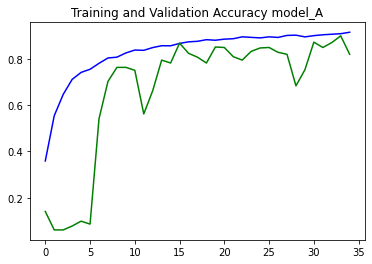

In [ ]:
# plot training accuracies
plt.plot(history_A.history['accuracy'],'b') #train acc
plt.plot(history_A.history['val_accuracy'],'g') #val acc
plt.title('Training and Validation Accuracy model_A') 
plt.show()

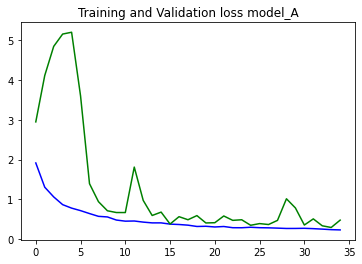

In [ ]:
# plot training and validation loss
plt.plot(history_A.history['loss'],'b') #train loss
plt.plot(history_A.history['val_loss'],'g') #val loss
plt.title('Training and Validation loss model_A') 
plt.show()

Train and test acuuracies are 86% and 81% respectively. Model 1 performed better.     
Loss and accuracy for test data first worsens untill 5th epoch and then gets better. 

#Predict using Model 1

In [56]:
#Predict labels

#We are uisng prediction datasets that has no labels

Predicted_classes = modela.predict_classes(testImgArray)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


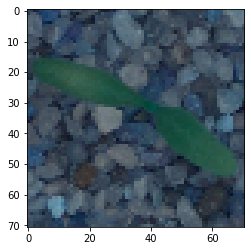

In [64]:
#Plot first image of prediction dataset
plt.imshow(testImgArray[0])

**Predicted class for 1st image**

In [58]:
Predicted_classes[0]

8

First images of the prediction dataset has been labelled as 9th Species of given plant seedling i.e. **Shepherds Purse**

#Image Classification using Neural Network

In [ ]:
model1 = Sequential()
model1.add(Flatten())
model1.add(Dense(128, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(12, activation="softmax"))

# Compile the model
model1.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# Fit the model
model1 = model1.fit(x=trainX, y=trainY, batch_size=32, epochs=35, validation_data=(testX, testY))

Epoch 1/35
135/135 [==============================] - 3s 18ms/step - loss: 2.1284 - accuracy: 0.2668 - val_loss: 1.5541 - val_accuracy: 0.4990
Epoch 2/35
135/135 [==============================] - 2s 16ms/step - loss: 1.2651 - accuracy: 0.5776 - val_loss: 1.2370 - val_accuracy: 0.5744
Epoch 3/35
135/135 [==============================] - 2s 16ms/step - loss: 0.9243 - accuracy: 0.6798 - val_loss: 1.2091 - val_accuracy: 0.5975
Epoch 4/35
135/135 [==============================] - 2s 16ms/step - loss: 0.6718 - accuracy: 0.7613 - val_loss: 1.2496 - val_accuracy: 0.5996
Epoch 5/35
135/135 [==============================] - 2s 16ms/step - loss: 0.5010 - accuracy: 0.8407 - val_loss: 1.3486 - val_accuracy: 0.6038
Epoch 6/35
135/135 [==============================] - 2s 16ms/step - loss: 0.3340 - accuracy: 0.8950 - val_loss: 1.3412 - val_accuracy: 0.6122
Epoch 7/35
135/135 [==============================] - 2s 16ms/step - loss: 0.2904 - accuracy: 0.9045 - val_loss: 1.4614 - val_accuracy: 0.6247

**Plot train and test accuracy**

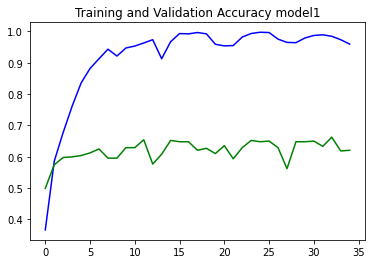

In [ ]:
# plot training accuracies
plt.plot(model1.history['accuracy'],'b') #train acc
plt.plot(model1.history['val_accuracy'],'g') #val acc
plt.title('Training and Validation Accuracy model1') 
plt.show()

**Plot train and test loss**

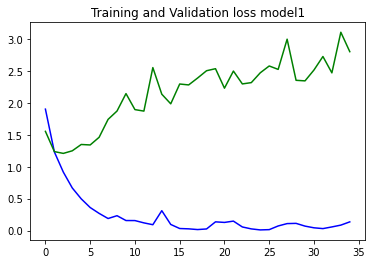

In [ ]:
# plot training accuracies
plt.plot(model1.history['loss'],'b') #train acc
plt.plot(model1.history['val_loss'],'g') #val acc
plt.title('Training and Validation loss model1') 
plt.show()

There is a significant different between the training and test performance.   
It means model is an underfit 

#Image classification using SVM

**Check shape of Training images**

In [68]:
len(clearTrainImg), clearTrainImg.shape

(4766, (4766, 71, 71, 3))

**Flatten the size images first**

In [69]:
n_samples = len(clearTrainImg)
clearTrainImg_flatten = clearTrainImg.reshape((n_samples, -1))

**Check the size of X and y inputs**

In [70]:
clearTrainImg_flatten.shape, encodeTrainLabels.shape

((4766, 15123), (4766,))

This is the required shape of X and y in Supervised learning

**Split into train and test**

In [71]:
X_train, X_test, y_train, y_test = train_test_split(clearTrainImg_flatten,encodeTrainLabels)
print('Training data and target sizes: \n{}, {}'.format(X_train.shape,y_train.shape))
print('Test data and target sizes: \n{}, {}'.format(X_test.shape,y_test.shape))

Training data and target sizes: 
(3574, 15123), (3574,)
Test data and target sizes: 
(1192, 15123), (1192,)


**Train the model using SVM**

In [75]:
from sklearn import datasets, svm, metrics
# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)
#fit to the trainin data
classifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

**Predict on test**

In [76]:
y_pred = classifier.predict(X_test)

**Print classification report**

In [77]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, y_pred)))

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.54      0.82      0.66        97
           2       0.79      0.21      0.33        73
           3       0.54      0.79      0.64       154
           4       0.00      0.00      0.00        59
           5       0.32      0.42      0.37       112
           6       0.55      0.87      0.68       151
           7       0.80      0.19      0.31        62
           8       0.39      0.55      0.46       135
           9       0.50      0.10      0.16        63
          10       0.75      0.79      0.77       126
          11       0.55      0.40      0.46        97

    accura

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision, recall and f1-score obtained from SVM model are 48%, 43% and 40% respectively   
Clearly CNN performs better for image classification than Neural network and SVM.

# Save model

In [88]:
#create directory
mkdir -p saved_model

In [89]:
# save model as CNN_model in saved_model directory
modela.save('saved_model/CNN_model')

INFO:tensorflow:Assets written to: saved_model/CNN_model/assets


In [90]:
ls saved_model

CNN_model/


# Load model and predict

**Load model**

In [93]:
new_model = tensorflow.keras.models.load_model('saved_model/CNN_model')


**Predict class of the plant seedling using model saved**

In [94]:
Predicted_classes_new = new_model.predict_classes(testImgArray)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


**Predict class for 1st image of the prediction dataset**

8


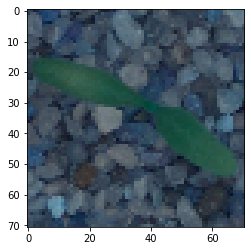

In [96]:
print(Predicted_classes_new[0])
plt.imshow(testImgArray[0])

Predicted class of the 1st image is 8 i.e. **Shepherds Purse**

#Comparison between CNN, NN, and ML

We observed that CNN and NN outperformed ML (SVM in this case).   
This is beacuse every Machine learning algorithm learns from the mapping from and an input i.e. limited sets of weights.      
In classification using ML algorithm learns fuction that separates two or more classes - this is known as decicion boundary. Decision boundary helps in identfying the class of data point   
Many ML algorithm can not learn non linear decision boundary   
Also feature selection and feature extraction of an image needs strong knowledge of the subject as well as the domain. It is an extremely time-consuming process.
In Deep learning, feature engineering can be automated.

Now, how CNN outperformed traditional Neural Network?   
While solving an image classification problem using traiditional NN, the first step is to convert a 2-dimensional image into a 1-dimensional vector prior to training the model. This has two drawbacks:
1. The number of trainable parameters increases drastically with an increase in the size of the image
2. NN loses the spatial features of an image. Spatial features refer to the arrangement of the pixels in an image   

Other common problem in traditional neural networks is the Vanishing and Exploding Gradient. This problem is associated with the backpropagation algorithm. So, in the case of a very deep neural network (network with a large number of hidden layers), the gradient vanishes or explodes as it propagates backward which leads to vanishing and exploding gradient.   

The building blocks of CNNs are filters a.k.a. kernels. Kernels are used to extract the relevant features from the input using the convolution operation.    
CNN captures the spatial features from an image, help us in identifying the object accurately, the location of an object, as well as its relation with other objects in an image   
CNN also follows the concept of parameter sharing. A single filter is applied across different parts of an input to produce a feature map


#Thanks